In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

In [2]:
# Stile dei plot
style.use('ggplot')

### Download data e salvataggio su csv

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

In [4]:
# il primo parametro è il TICKER
df = web.DataReader('TSLA', 'yahoo', start, end)
df.head() # df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


In [5]:
df.to_csv('tsla.csv')

### Lettura da csv

In [6]:
# In questo modo imposto anche che la colonna date deve farmi da indice
df = pd.read_csv('tsla.csv', parse_dates = True, index_col = 0)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001


### Plot

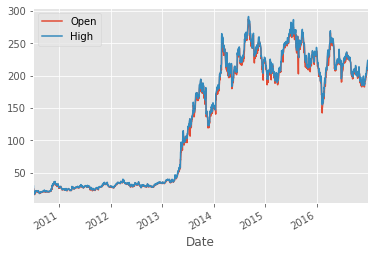

In [7]:
# df.plot() # plotto tutto
# df['Adj Close'].plot() # plotto una sola colonna
df[['Open', 'High']].plot() # plotto due colonne
plt.show()

### Data manipulation and visualization

In [8]:
# Creiamo una nuova colonna che è la 100ma
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.head() # Ovviamente i primi 99 sono Nan

# In ques modo 100ma=AdjClose quando non posso dargli un valore
# df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean() 

# df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,NaN
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,NaN
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,NaN
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,NaN


In [9]:
# Elimino i Nan
df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2010-11-17,30.750000,28.610001,30.200001,29.490000,750000,29.490000,20.9879
2010-11-18,30.740000,28.920000,30.670000,29.889999,956100,29.889999,21.0479
2010-11-19,31.370001,29.700001,30.160000,30.990000,1150500,30.990000,21.1195
2010-11-22,33.450001,31.500000,31.570000,33.400002,1529700,33.400002,21.2339
2010-11-23,35.680000,32.189999,33.290001,34.570000,1577800,34.570000,21.3876


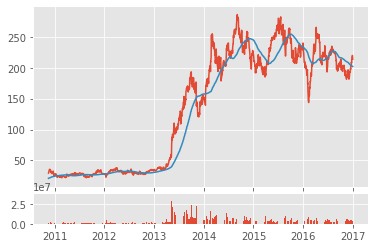

In [10]:
# In questo molto il grafico è stampato su una pagina a parte dove è possibile zoommare
# una volta lanciato il comando funziona sempre fino al reset del notebook
# %matplotlib auto

ax1 =  plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 =  plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) # sharex così l'asse delle x viene condiviso

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()